In [85]:
# standard Python packages for scientific computing:
import numpy as np  # Numerical Python
import matplotlib.pyplot as plt  # plotting
import math as m
import os  # operating system / file utilities
import sys
from copy import deepcopy
from Grid1DCartesian import *
from interpolation_scheme import *
from limiters import *
from ShallowWaterSim import *
import pstats
from pstats import SortKey
import cProfile
from examples import *
from ShallowWaterData import *
    
# from numba import jit
# first did "conda install numba".  See
# https://numba.readthedocs.io/en/stable/user/5minguide.html

In [86]:
# default figure size okay if notebook is zoomed for class presentation:
# plt.rcParams["figure.figsize"] = [6.4, 4.8] # default
plt.rcParams["figure.figsize"] = [8.0, 6.0]

In [107]:
# create a subdirectory to hold figures
# (if it doesn't exist already)
os.makedirs("../figs", exist_ok=True)

## Running ShallowWaterSim object

### Example from LeVeque (2002) Figure 13.1

In [88]:
pr = cProfile.Profile()
pr.enable()
run_sill()
pr.disable()

KeyboardInterrupt: 

In [ ]:
p = pstats.Stats(pr)
p.strip_dirs().sort_stats('tottime').print_stats(20)

In [ ]:
ls ../../clawpack/_output_sill/

In [ ]:
cat ../../clawpack/_output_sill/fort.q0002

In [ ]:
data = np.genfromtxt('../../clawpack/_output_sill/fort.q0000', skip_header = 6)

In [ ]:
x = -1.00e0 + (np.arange(500) + 0.5) * 4e-3

In [ ]:
plt.plot(x,data[:,0])
plt.plot(x,data[:,1])
plt.grid()

In [ ]:
cat ../../clawpack/_output_sill/fort.t0008

In [ ]:
bata = np.genfromtxt('../../clawpack/_output_sill/fort.a0000', skip_header = 6)

In [ ]:
plt.plot(x, bata)
plt.grid()

In [ ]:
z = 0 * bata - 1
where = np.where(np.abs(x) <= 0.92)[0]
z[where] = 0.8 * np.exp(-(x[where]/0.2)**2) - 1
#z = 0.8 * np.exp(-(x/0.2)**2) - 1

In [ ]:
plt.plot(x, bata - z)
plt.grid()

In [ ]:
eta = data[:,0] + z
plt.plot(x, eta)
plt.grid()

In [ ]:
eta_model = 0 * bata
where = np.where(np.abs(x+0.40) <= 3)[0]
eta_model[where] = 0.1 * np.exp(-((x[where]+0.40)/0.2)**2)

In [ ]:
plt.plot(x, eta - eta_model)
plt.grid()

In [ ]:
aa = np.genfromtxt('../output_Green_Law/files/data_106922.txt')

In [ ]:
fin = open('../output_Green_Law/files/data_106922.txt','r')

In [ ]:
string = fin.readline()
string

In [ ]:
float(string.split()[3])

In [ ]:
fin.close()

In [ ]:
cat ../output_Green_Law/files/data_106922.txt

In [ ]:
from ShallowWaterData import *

In [ ]:
dd = read_data('../output_Green_Law/files/data_106922.txt')

In [ ]:
plt.plot(dd[3],dd[4])

In [91]:
# PyClaw Example
def run_sill1():
    # define grid points
    xmin = -1
    xmax = 1
    N = 500
    x = np.linspace(xmin, xmax, N+1)
    x = (x[:-1] + x[1:]) / 2

    # bathymetry
    b = -1 * (x ** 0)
    where = np.where(np.abs(x) <= 0.92)[0]
    b[where] = -1 + 0.8 * np.exp(-(x[where]/0.2)**2)

    # initial water surface
    s = 0 * x
    s = 0.1 * np.exp(- ((x+0.4)/0.2)**2)

    # initial speed
    u = x * 0

    # boundary condition
    bc = 'non-reflecting'

    # gravity acceleration 
    g = 9.8

    # initialize WaterWaveSim object
    tank = ShallowWaterSim(x, b, s, u, g, bc)
    
    CFL = 0.1

    # preventing the simulation to run eternally when dt is too small
    MAX_STEPS = 100000

    output_directory = '../output_sill_u5_SuHu5/'

    times = np.arange(0.1,1.1,0.1)

    problem = 'shallowwater'
    interp_scheme = fifth_order_upwind
    limiter = interp_SuHu5

    hGrid, uGrid = tank.simulate(CFL, MAX_STEPS, times, problem, \
                                 output_directory, interp_scheme, \
                                limiter)

In [92]:
pr = cProfile.Profile()
pr.enable()
run_sill1()
pr.disable()

The simulation is completed



In [93]:
p = pstats.Stats(pr)
p.strip_dirs().sort_stats('tottime').print_stats(20)

         132414974 function calls (126169440 primitive calls) in 102.712 seconds

   Ordered by: internal time
   List reduced from 1215 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
11283607/5434557   14.797    0.000   35.708    0.000 copy.py:132(deepcopy)
  1169712   13.612    0.000   13.612    0.000 minfunc.py:7(minmin)
  4158976   10.182    0.000   28.521    0.000 Grid1DCartesian.py:146(__getitem__)
   731070    7.865    0.000   15.923    0.000 minfunc.py:18(minmod)
   146214    7.478    0.000   65.543    0.000 limiters.py:15(interp_SuHu5)
   463012    5.625    0.000    5.625    0.000 minfunc.py:37(maxmax)
  8383451    5.331    0.000    6.628    0.000 copy.py:252(_keep_alive)
7554835/7262407    5.123    0.000    7.093    0.000 {method '__deepcopy__' of 'numpy.ndarray' objects}
  4159020    2.640    0.000    2.640    0.000 Grid.py:44(get_last_grid)
   146214    2.495    0.000    7.761    0.000 interpolation_scheme.py:54(fifth_

In [101]:
path = '../output_sill_u5_SuHu5/files/'

In [105]:
files_mysim = np.sort(os.listdir(path=path))
files_mysim

array(['data_000000.txt', 'data_000835.txt', 'data_001675.txt',
       'data_002496.txt', 'data_003332.txt', 'data_004168.txt',
       'data_004979.txt', 'data_005766.txt', 'data_006552.txt',
       'data_007338.txt', 'data_008123.txt'], dtype='<U15')

In [106]:

for ii in np.sort(files_mysim):
    dd = read_data(path + ii)
    fig = plt.figure()
    plt.plot(dd[3],dd[5],'-',label='surface')
    plt.plot(dd[3],dd[4],'-',label='bottom')
    plt.ylim((-1.05,0.105))
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    plt.title('time = %.3f s' % dd[1])
    plt.grid()
    plt.savefig('../figs/'+ii[:-4]+'.jpg')
    plt.close()

In [15]:
os.makedirs("../figs_PyClaw", exist_ok=True)

In [109]:
path_sill_clawpack = '../../clawpack/_output_sill/'
files = os.listdir(path=path_sill_clawpack)
bata = np.genfromtxt('../../clawpack/_output_sill/fort.a0000', skip_header = 6)
'''
for ii, file  in enumerate(np.sort(files)[12:23]):
    # CLAWPACK
    data = np.genfromtxt(path_sill_clawpack + file, skip_header = 6)
    x = np.linspace(-1,1,501)
    x = (x[1:]+x[:-1])/2
    plt.plot(x, data[:,0]+bata, '-', label='surface')
    plt.plot(x, bata, '-', label='bottom')
    plt.ylim((-1.05,0.105))
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    plt.title('time = %.3f s' % (0.1 * ii))
    plt.grid()
    plt.savefig('../figs_PyClaw/'+files_mysim[ii][:-4]+'.jpg')
    plt.show()
'''

"\nfor ii, file  in enumerate(np.sort(files)[12:23]):\n    # CLAWPACK\n    data = np.genfromtxt(path_sill_clawpack + file, skip_header = 6)\n    x = np.linspace(-1,1,501)\n    x = (x[1:]+x[:-1])/2\n    plt.plot(x, data[:,0]+bata, '-', label='surface')\n    plt.plot(x, bata, '-', label='bottom')\n    plt.ylim((-1.05,0.105))\n    plt.xlabel('x (m)')\n    plt.ylabel('z (m)')\n    plt.title('time = %.3f s' % (0.1 * ii))\n    plt.grid()\n    plt.savefig('../figs_PyClaw/'+files_mysim[ii][:-4]+'.jpg')\n    plt.show()\n"

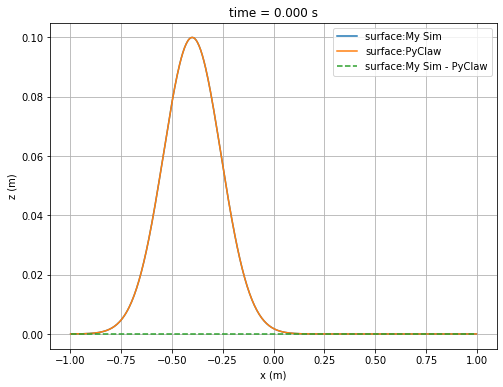

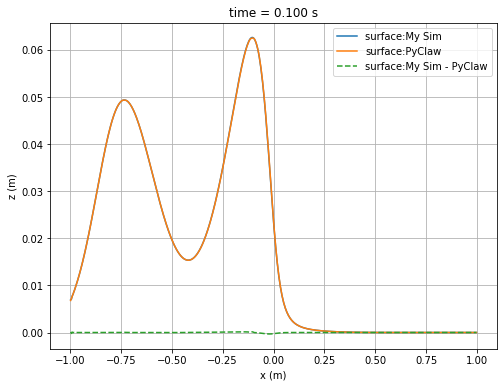

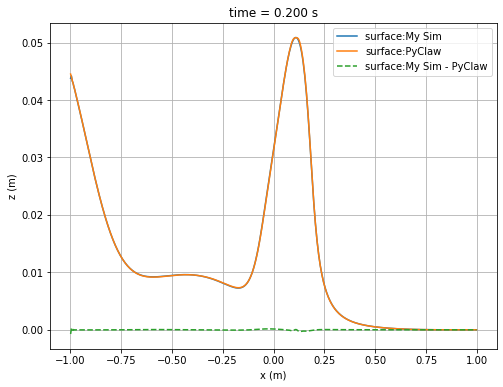

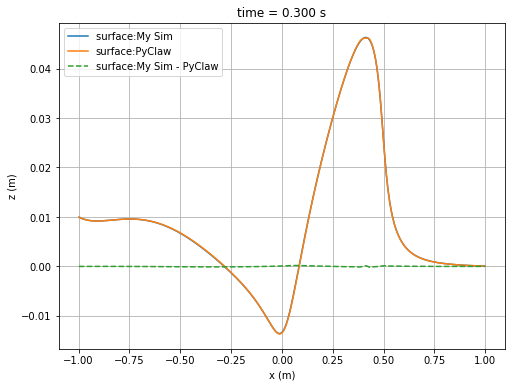

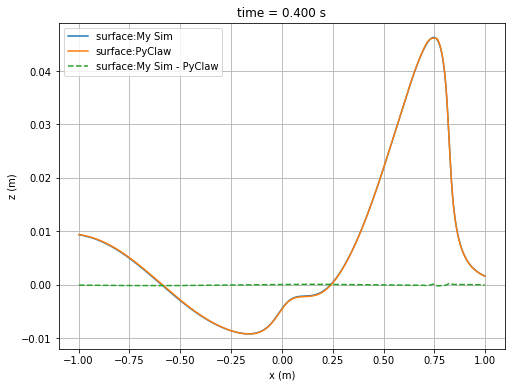

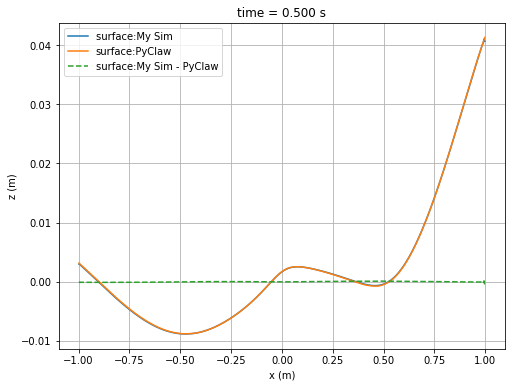

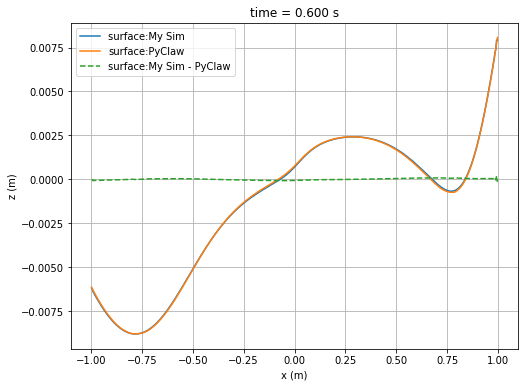

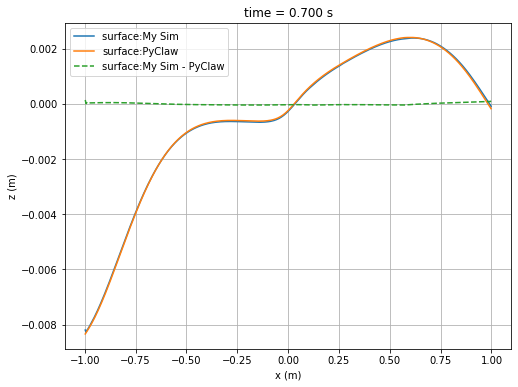

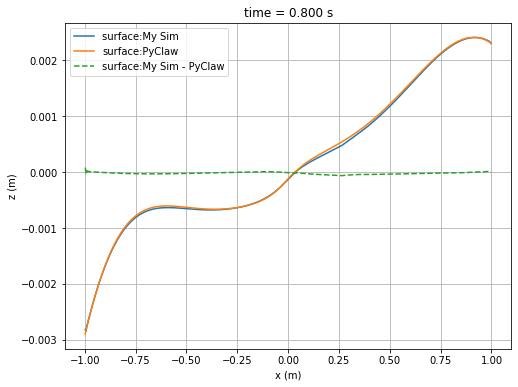

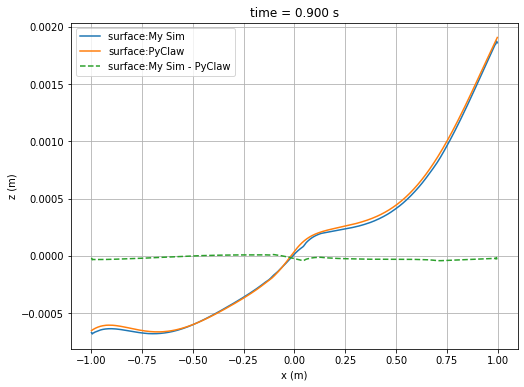

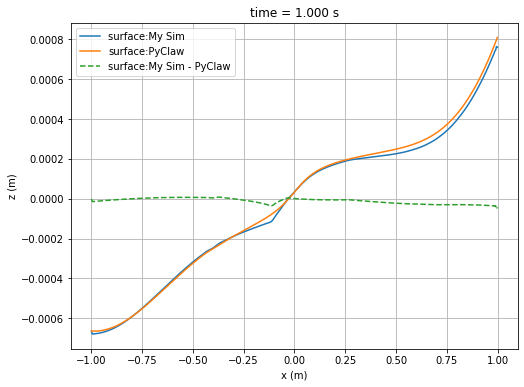

In [116]:
for ii, file  in enumerate(np.sort(files)[12:23]):
    # CLAWPACK
    data = np.genfromtxt(path_sill_clawpack + file, skip_header = 6)
    x = np.linspace(-1,1,501)
    x = (x[1:]+x[:-1])/2
    #SHALLOWWATERSIM
    dd = read_data(path + np.sort(files_mysim)[ii])
    fig = plt.figure()
    plt.plot(dd[3],dd[5],'-',label='surface:My Sim')
    plt.plot(dd[3],(data[:,0]+bata),'-',label='surface:PyClaw')
    plt.plot(dd[3],dd[5] - (data[:,0]+bata),'--',label='surface:My Sim - PyClaw')
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    plt.title('time = %.3f s' % dd[1])
    plt.grid()
    plt.savefig('../figs/surface_'+np.sort(files_mysim)[ii][:-4]+'.jpg')
    plt.show()

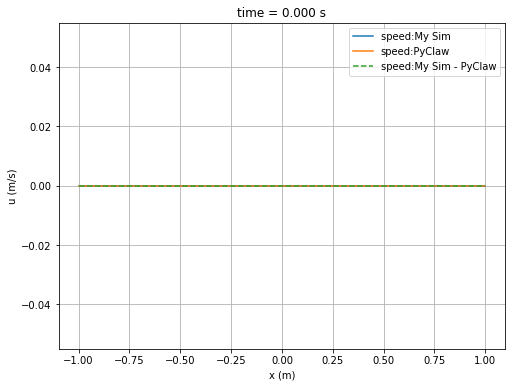

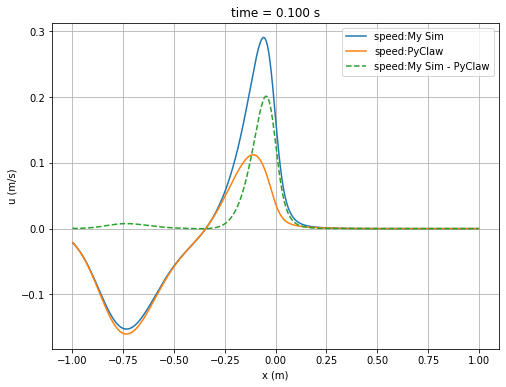

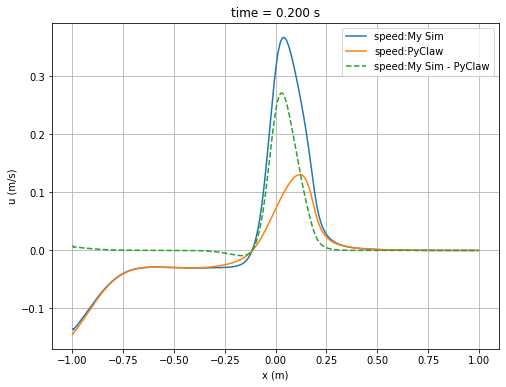

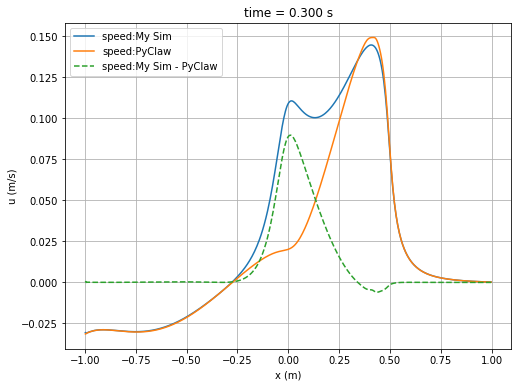

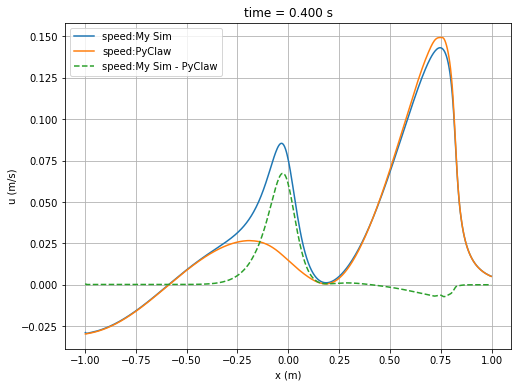

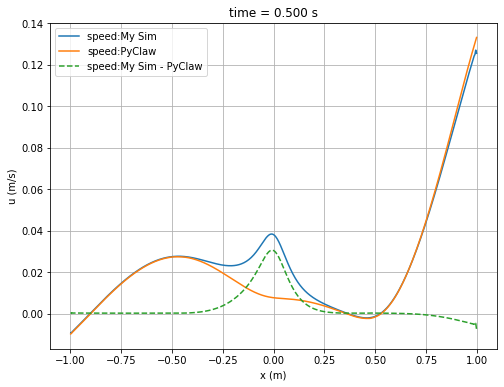

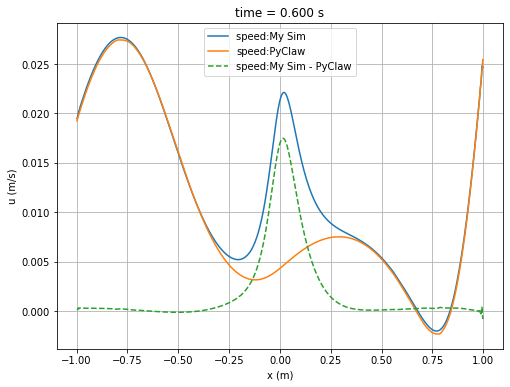

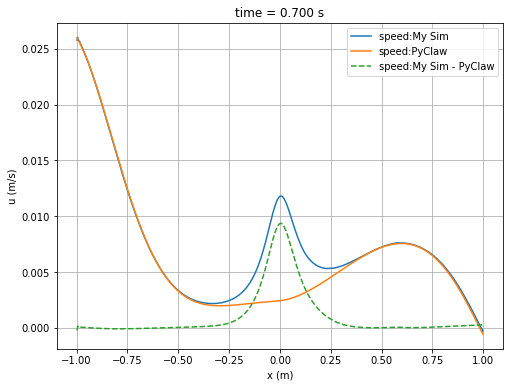

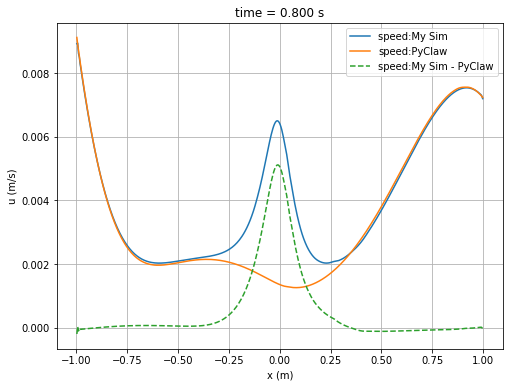

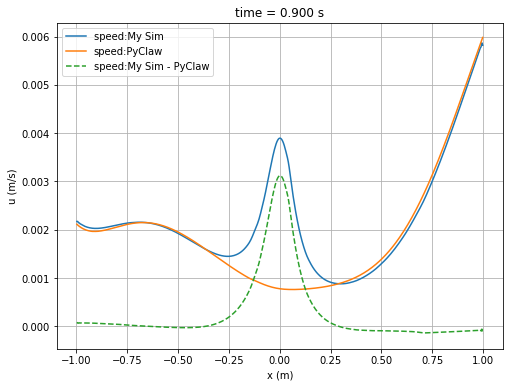

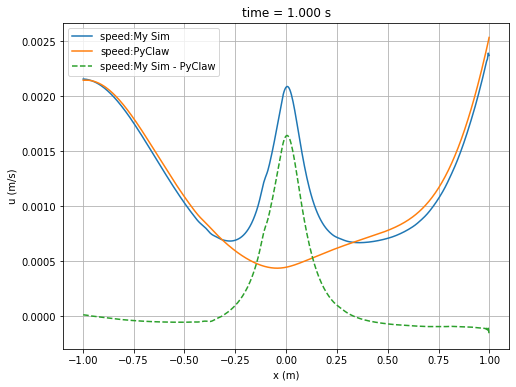

In [114]:
for ii, file  in enumerate(np.sort(files)[12:23]):
    # CLAWPACK
    data = np.genfromtxt(path_sill_clawpack + file, skip_header = 6)
    x = np.linspace(-1,1,501)
    x = (x[1:]+x[:-1])/2
    #SHALLOWWATERSIM
    dd = read_data(path + np.sort(files_mysim)[ii])
    fig = plt.figure()
    plt.plot(dd[3],dd[6],'-',label='speed:My Sim')
    plt.plot(dd[3],data[:,1],'-',label='speed:PyClaw')
    plt.plot(dd[3],dd[6] - data[:,1],'--',label='speed:My Sim - PyClaw')
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('u (m/s)')
    plt.title('time = %.3f s' % dd[1])
    plt.grid()
    plt.savefig('../figs/speed_'+np.sort(files_mysim)[ii][:-4]+'.jpg')
    plt.show()

### Simple Advection Problem

In [12]:
# define grid points
xmin = 0
xmax = 1
N = 200
x = np.linspace(xmin, xmax, N+1)
x = (x[:-1] + x[1:]) / 2

# bathymetry
b = -1 * (x ** 0)

# initial water surface
s = 1 * np.exp(- (x-0.3)**2 / (2 * 0.05**2)) + 0
where = np.where(np.abs(x - 0.7) <= 0.1)
s[where] = 1

# initial speed
u = x * 0 + 1

# boundary condition
bc = 'periodic'

# gravity acceleration 
g = 0

# initialize WaterWaveSim object
tank = ShallowWaterSim(x, b, s, u, g, bc)

CFL = 0.1

# preventing the simulation to run eternally when dt is too small
MAX_STEPS = 100000

output_directory = '../output_simple/'

times = np.arange(0.1,1.1,0.1)

problem = 'passive'
interp_scheme = fifth_order_upwind
limiter = interp_SuHu5

tank.simulate(CFL, MAX_STEPS, times, problem, output_directory, interp_scheme, limiter)

In [13]:
path = '../output_simple_5u_SuHu5/files/'
files = np.sort(os.listdir(path=path))
files

array(['data_000000.txt', 'data_000200.txt', 'data_000400.txt',
       'data_000600.txt', 'data_000800.txt', 'data_001000.txt',
       'data_001201.txt', 'data_001401.txt', 'data_001601.txt',
       'data_001801.txt', 'data_002001.txt'], dtype='<U15')

In [14]:
dd0 = read_data(path + files[0])
dd1 = read_data(path + files[-1])

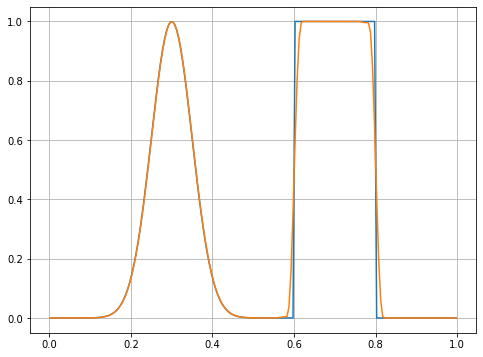

In [15]:
plt.plot(dd0[3], dd0[5], label = 'initial')
plt.plot(dd1[3], dd1[5], label = '1-cycle')
plt.grid()

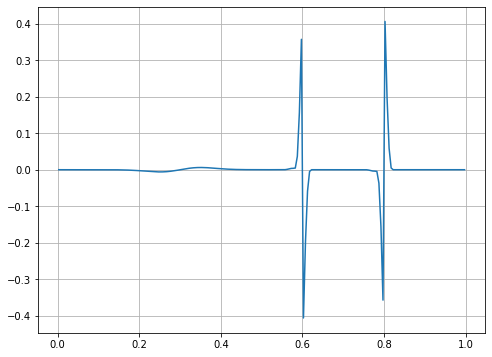

In [16]:
plt.plot(dd0[3], dd1[5]-dd0[5], label = 'difference')
plt.grid()

In [35]:
# Measure errors (for the passive advection problem).
#
# For passive advection, after 1 time period, the solution
# should exaclty overlay the initial condition.  Use this 
# to compute errors. Use various error norms.
#
# (Note: high order accuracy expected only for smooth initial conditions.)
#
def err_comp(u,u_init,x):
    err_rms = np.sqrt(np.mean((u-u_init)**2))
    mag = np.sqrt(np.mean(u_init**2))
    err_1 = np.mean(abs(u-u_init))
    err_max = max(abs(u-u_init))
    
    print("rel err_rms, mag=", err_rms/mag, mag)
    print("rel err_1       =", err_1/mag)
    print("err_max         =", err_max)
    print("most negative (or min) u =",  u[np.argmin(u)], "at x=", x[np.argmin(u)])
    print('')
    return err_rms/mag, err_max, err_1/mag

In [36]:
e1, e2, e3 = err_comp(dd1[5], dd0[5], dd0[3])

rel err_rms, mag= 0.009723715341618101 0.2976956367101904
rel err_1       = 0.00442077490457701
err_max         = 0.013193229999999945
most negative (or min) u = 9.3258734e-15 at x= 0.6725



### Simple Advection Problem with space dependent speed

In [17]:
# define grid points
xmin = 0
xmax = 1
N = 200
x = np.linspace(xmin, xmax, N+1)
x = (x[:-1] + x[1:]) / 2

# bathymetry
b = -1 * (x ** 0)

# initial water surface
s = 1 * np.exp(- (x-0.3)**2 / (2 * 0.05**2)) + 0
#where = np.where(np.abs(x - 0.7) <= 0.1)
#s[where] = 1

# initial speed
u = 1 + 0.5 * np.sin(2 * np.pi * x) 

# boundary condition
bc = 'periodic'

# gravity acceleration 
g = 0

# initialize WaterWaveSim object
tank = ShallowWaterSim(x, b, s, u, g, bc)

CFL = 0.1

# preventing the simulation to run eternally when dt is too small
MAX_STEPS = 100000

output_directory = '../output_diff_speed/'

times = np.linspace(0,1.1547005383792512,11)[1:]

problem = 'passive'
interp_scheme = fifth_order_upwind
limiter = interp_SuHu5

tank.simulate(CFL, MAX_STEPS, times, problem, output_directory, interp_scheme, limiter)

In [18]:
path = '../output_diff_speed/files/'
files = np.sort(os.listdir(path=path))
files

array(['data_000000.txt', 'data_000347.txt', 'data_000693.txt',
       'data_001040.txt', 'data_001386.txt', 'data_001732.txt',
       'data_002079.txt', 'data_002425.txt', 'data_002772.txt',
       'data_003118.txt', 'data_003464.txt'], dtype='<U15')

In [19]:
dd0 = read_data(path + files[0])
dd1 = read_data(path + files[-1])

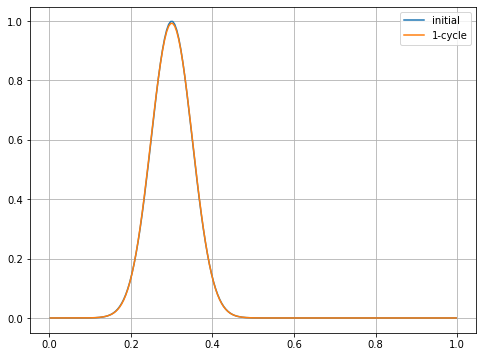

In [20]:
plt.plot(dd0[3], dd0[5], label = 'initial')
plt.plot(dd1[3], dd1[5], label = '1-cycle')
plt.grid()
plt.legend()

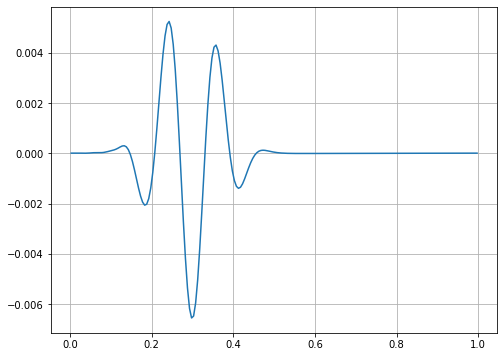

In [21]:
plt.plot(dd0[3], dd1[5]-dd0[5], label = 'difference')
plt.grid()

In [38]:
# integrates a function using 5-point Gauss-Legendre Quadrature
def boundGLQ5(func, a, b, npts):
    # define grid points
    x = np.linspace(a, b, npts)
    # grid spacing
    h = x[1] - x[0]
    
    # Gauss-Legendre nodes within a grid
    glnodes = 1/3 * np.array([-np.sqrt(5+2*np.sqrt(10/7)), \
                              -np.sqrt(5-2*np.sqrt(10/7)), \
                              0, \
                              np.sqrt(5-2*np.sqrt(10/7)), \
                              np.sqrt(5+2*np.sqrt(10/7))])
    # Gauss-Legendre weights
    glweights = np.array([(322-13*np.sqrt(70)) / 900, \
                          (322+13*np.sqrt(70)) / 900, \
                          128 / 225, \
                          (322+13*np.sqrt(70)) / 900, \
                          (322-13*np.sqrt(70)) / 900])
    
    # computes the integral of a subdomain and adds up together
    A = 0
    for ii in range(np.size(x)-1):
        x_center = (x[ii+1] + x[ii]) / 2
        x_range = (x[ii+1] - x[ii]) / 2
        xgl = x_center + (glnodes * x_range)
        # factor h/2 comes from changing of variable
        A = A + h/2 * (np.sum(glweights * func(xgl)))
    
    return A, h

In [53]:
def func(x):
    f = 1 / (1 + 0.5 * np.sin(2 * np.pi * x))
    return f

In [54]:
t = boundGLQ5(func, 0, 1, 200)
t

(1.1547005383792512, 0.005025125628140704)

In [11]:
# define grid points
xmin = -6
xmax = 6
N = 240
x = np.linspace(xmin, xmax, N+1)
x = (x[:-1] + x[1:]) / 2

# bathymetry
b = -0 * (x ** 0)

# initial water surface
s = 0.5 * np.exp(- x**2 / 0.35**2) + 1

# initial speed
u = x * 0

# boundary condition
bc = 'periodic'

# gravity acceleration 
g = 1

# initialize WaterWaveSim object
tank = ShallowWaterSim(x, b, s, u, g, bc)

CFL = 0.1

# preventing the simulation to run eternally when dt is too small
MAX_STEPS = 100000

output_directory = '../output_shallow_water/'

times = np.arange(0.1,3.1,0.1)

problem = 'shallowwater'
interp_scheme = third_order_upwind
limiter = interp_vanLeer3

tank.simulate(CFL, MAX_STEPS, times, problem, output_directory, interp_scheme, limiter)

In [4]:
# define grid points
xmin = -1
xmax = 1
N = 500
x = np.linspace(xmin, xmax, N+1)
x = (x[:-1] + x[1:]) / 2

# bathymetry
b = -100 * (x ** 0) + 0.5

# initial water surface
s = 1 * np.exp(- (x-0)**2 / (2 * 0.05**2)) + 0

# initial speed
u = x * 0 + 0

# boundary condition
bc = 'reflecting'

# gravity acceleration 
g = 1/100

# initialize WaterWaveSim object
tank = ShallowWaterSim(x, b, s, u, g, bc)

CFL = 0.1

# preventing the simulation to run eternally when dt is too small
MAX_STEPS = 100000

output_directory = '../output_reflecting/'

times = np.arange(0.1,2.1,0.1)

problem = 'shallowwater'
interp_scheme = fifth_order_upwind
limiter = interp_SuHu5

tank.simulate(CFL, MAX_STEPS, times, problem, output_directory, interp_scheme, limiter)

The simulation is completed



(<Grid1DCartesian.Grid1DCartesian at 0x7fd9b8c0e0d0>,
 <Grid1DCartesian.Grid1DCartesian at 0x7fd9b8c0e390>)

In [32]:
def residue_simple(N):
    # define grid points
    xmin = 0
    xmax = 1
    x = np.linspace(xmin, xmax, N+1)
    x = (x[:-1] + x[1:]) / 2
    dx = (xmax - xmin) / N

    # bathymetry
    b = -1 * (x ** 0)

    # initial water surface
    s = 1 * np.exp(- (x-0.5)**2 / (2 * 0.05**2)) + 0
    #where = np.where(np.abs(x - 0.7) <= 0.1)
    #s[where] = 1

    # initial speed
    u = x * 0 + 1

    # boundary condition
    bc = 'periodic'

    # gravity acceleration 
    g = 0

    # initialize WaterWaveSim object
    tank = ShallowWaterSim(x, b, s, u, g, bc)

    CFL = 0.5

    # preventing the simulation to run eternally when dt is too small
    MAX_STEPS = 100000

    output_directory = '../output_simple_3u_vanLeer3_CFL_0.5/'

    times = np.array([1])

    problem = 'passive'
    interp_scheme = third_order_upwind
    limiter = interp_vanLeer3

    hGrid, uGrid = tank.simulate(CFL, MAX_STEPS, times, problem, \
                                 output_directory, interp_scheme, \
                                 limiter)
    s_1cycle = hGrid.get_value('grid') + b
    err = s_1cycle - s
    return err, dx

In [57]:
# define grid points
xmin = 0
xmax = 1
x = np.linspace(xmin, xmax, N+1)
x = (x[:-1] + x[1:]) / 2
dx = (xmax - xmin) / 100

# bathymetry
b = -1 * (x ** 0)

# initial water surface
s = 1 * np.exp(- (x-0.5)**2 / (2 * 0.05**2)) + 0
#where = np.where(np.abs(x - 0.7) <= 0.1)
#s[where] = 1

# initial speed
u = x * 0 + 1

dd = read_data('../output_simple_5u_SuHu5_CFL_0.5/files/data_000200.txt')

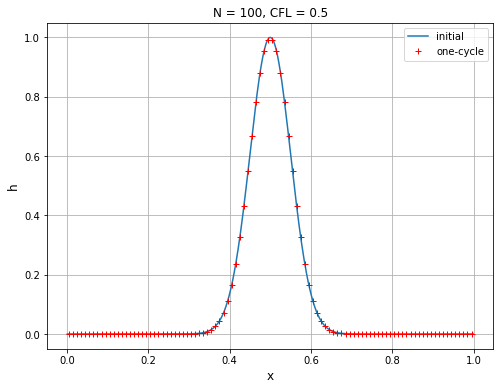

In [58]:
plt.plot(x, s, label = 'initial')
plt.plot(dd[3],dd[5], '+r', label = 'one-cycle')
plt.grid()
plt.title('N = 100, CFL = 0.5')
plt.legend()
plt.xlabel('x', size = 12)
plt.ylabel('h', size = 12)
plt.savefig('../advection_5u_SuHu5_CFL_0p5_N_100.pdf', dpi = 150)

In [28]:
Ns = np.array([50,100,200,400,800,1600,3200,6400,12800,25600])
err_RMSs = np.zeros(np.shape(Ns))
dxs = np.zeros(np.shape(Ns))
for ii in range(np.size(Ns)):
    err, dx = residue_simple(Ns[ii])
    err_RMS = np.sqrt(np.sum(err ** 2) / np.size(err))
    err_RMSs[ii] = err_RMS
    dxs[ii] = dx

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed

step 10000 completed: t = 0.7812500 s, dt = 0.0000781 s

The simulation is completed

step 10000 completed: t = 0.3906250 s, dt = 0.0000391 s

step 20000 completed: t = 0.7812500 s, dt = 0.0000391 s

The simulation is completed

step 10000 completed: t = 0.1953125 s, dt = 0.0000195 s

step 20000 completed: t = 0.3906250 s, dt = 0.0000195 s

step 30000 completed: t = 0.5859375 s, dt = 0.0000195 s

step 40000 completed: t = 0.7812500 s, dt = 0.0000195 s

step 50000 completed: t = 0.9765625 s, dt = 0.0000195 s

The simulation is completed



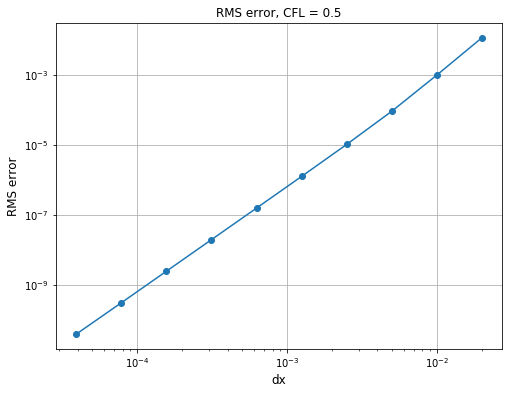

In [29]:
plt.loglog(dxs, err_RMSs, 'o-')
plt.grid()
plt.xlabel('dx', size = 12)
plt.ylabel('RMS error', size = 12)
plt.title('RMS error, CFL = 0.5')
plt.savefig('../RMS_ERROR_CFL_0p5.pdf', dpi = 300)

In [30]:
p = np.log2((err_RMSs[:-2] - err_RMSs[1:-1]) / (err_RMSs[1:-1] - err_RMSs[2:]))

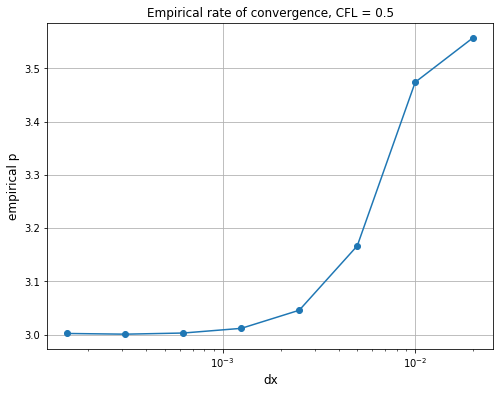

In [31]:
plt.semilogx(dxs[:-2],p, '-o')
plt.grid()
plt.xlabel('dx', size = 12)
plt.ylabel('empirical p', size = 12)
plt.title('Empirical rate of convergence, CFL = 0.5')
plt.savefig('../Empirical_p_CFL_0p5.pdf', dpi = 300)

In [39]:
Ns = np.array([50,100,200,400,800,1600,3200,6400,12800,25600])
err_RMSs1 = np.zeros(np.shape(Ns))
dxs1 = np.zeros(np.shape(Ns))
for ii in range(np.size(Ns)):
    err, dx = residue_simple(Ns[ii])
    err_RMS = np.sqrt(np.sum(err ** 2) / np.size(err))
    err_RMSs1[ii] = err_RMS
    dxs1[ii] = dx

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed

step 10000 completed: t = 0.7812500 s, dt = 0.0000781 s

The simulation is completed

step 10000 completed: t = 0.3906250 s, dt = 0.0000391 s

step 20000 completed: t = 0.7812500 s, dt = 0.0000391 s

The simulation is completed

step 10000 completed: t = 0.1953125 s, dt = 0.0000195 s

step 20000 completed: t = 0.3906250 s, dt = 0.0000195 s

step 30000 completed: t = 0.5859375 s, dt = 0.0000195 s

step 40000 completed: t = 0.7812500 s, dt = 0.0000195 s

step 50000 completed: t = 0.9765625 s, dt = 0.0000195 s

The simulation is completed



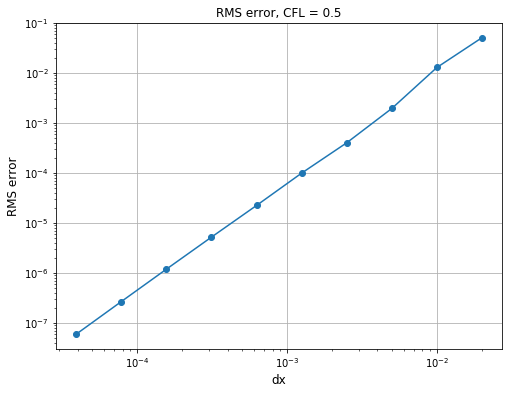

In [40]:
plt.loglog(dxs1, err_RMSs1, 'o-')
plt.grid()
plt.xlabel('dx', size = 12)
plt.ylabel('RMS error', size = 12)
plt.title('RMS error, CFL = 0.5')
plt.savefig('../RMS_ERROR_CFL_0p5_3u_vanLeer.pdf', dpi = 300)

In [41]:
p1 = np.log2((err_RMSs1[:-2] - err_RMSs1[1:-1]) / (err_RMSs1[1:-1] - err_RMSs1[2:]))

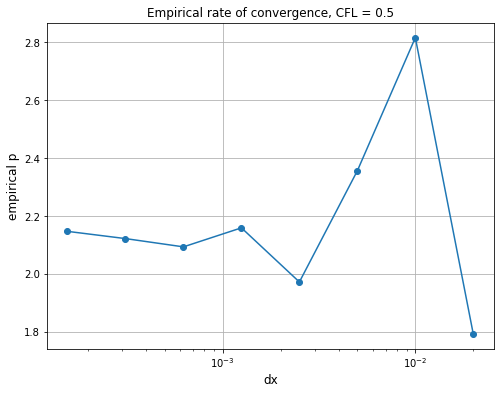

In [117]:
plt.semilogx(dxs1[:-2],p1, '-o')
plt.grid()
plt.xlabel('dx', size = 12)
plt.ylabel('empirical p', size = 12)
plt.title('Empirical rate of convergence, CFL = 0.5')
plt.savefig('../Empirical_p_CFL_0p5_3u_vanLeer.pdf', dpi = 300)

### LeVeque 2002

In [77]:
# Figure 13.1 from LeVeque (2002)
def run_LeVeque():
    # define grid points
    xmin = -6
    xmax = 6
    N = 1200
    x = np.linspace(xmin, xmax, N+1)
    x = (x[:-1] + x[1:]) / 2

    # bathymetry
    b = -0 * (x ** 0)

    # initial water surface
    s = 0.4 * np.exp(- x**2 / 0.35**2) + 1

    # initial speed
    u = x * 0

    # boundary condition
    bc = 'periodic'

    # gravity acceleration 
    g = 1

    # initialize WaterWaveSim object
    tank = ShallowWaterSim(x, b, s, u, g, bc)
    
    CFL = 0.1

    # preventing the simulation to run eternally when dt is too small
    MAX_STEPS = 100000

    output_directory = '../output_LeVeque2002_u5_SuHu5_1200/'

    times = np.array([0.5, 1, 2, 3])

    problem = 'shallowwater'
    interp_scheme = fifth_order_upwind
    limiter = interp_SuHu5

    hGrid, uGrid = tank.simulate(CFL, MAX_STEPS, times, problem, \
                                 output_directory, interp_scheme, \
                                 limiter)

In [78]:
run_LeVeque()

The simulation is completed



In [79]:
path = '../output_LeVeque2002_u5_SuHu5_1200/files/'
files = np.sort(os.listdir(path=path))
files

array(['data_000000.txt', 'data_000626.txt', 'data_001264.txt',
       'data_002539.txt', 'data_003810.txt'], dtype='<U15')

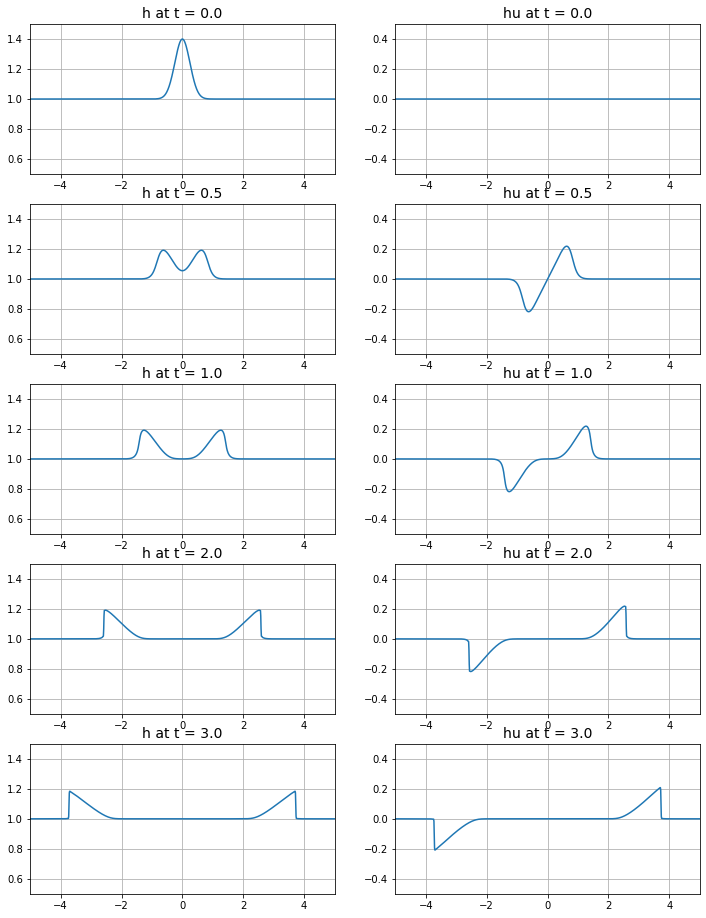

In [84]:
fig = plt.figure(figsize = [12,16])
for ii, file in enumerate(files):
    dd = read_data(path + file)
    ax1 = fig.add_subplot(5,2,2*ii+1)
    ax1.plot(dd[3],dd[5])
    ax1.grid()
    ax1.set_xlim((-5, 5))
    ax1.set_ylim((0.5, 1.5))
    ax1.set_title('h at t = %.1f' % dd[1], size = 14)
    
    ax2 = fig.add_subplot(5,2,2*ii+2)
    ax2.plot(dd[3],dd[5]*dd[6])
    ax2.grid()
    ax2.set_xlim((-5, 5))
    ax2.set_ylim((-0.5, 0.5))
    ax2.set_title('hu at t = %.1f' % dd[1], size = 14)
plt.savefig('../LeVeque2002_u5_SuHu5_1000.pdf', dpi = 150)